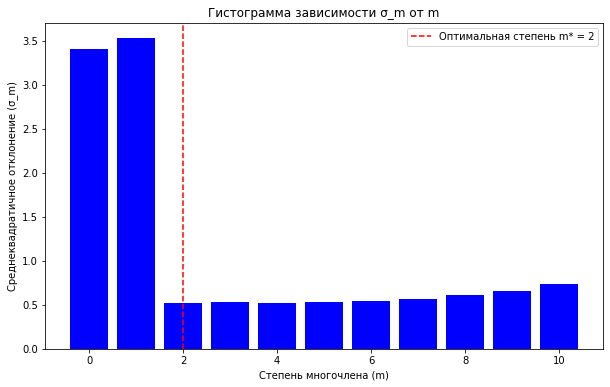

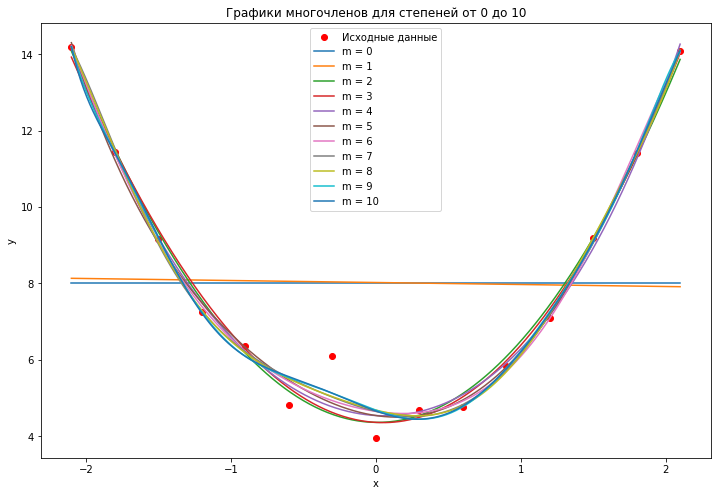

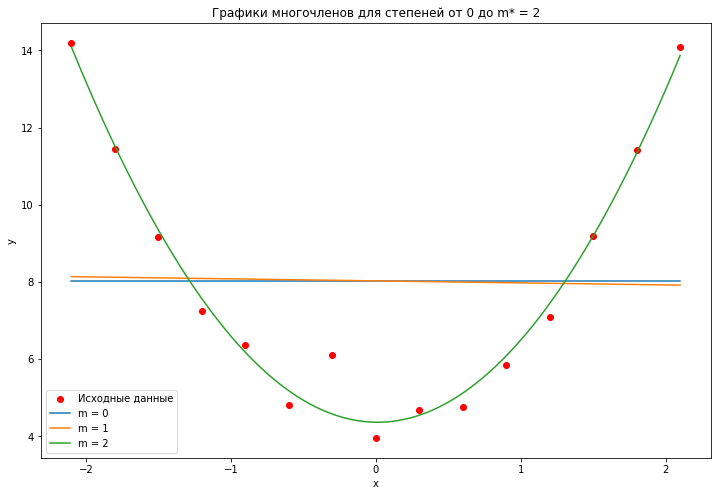

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3, 0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1])
y = np.array([14.1982, 11.4452, 9.1586, 7.2426, 6.364, 4.8182, 6.1088, 3.9536, 4.6872, 4.7601, 5.8511, 7.101, 9.1792, 11.421, 14.097])

def mnk(x, y, m):
    n = len(x)
    A = np.zeros((m+1, m+1))
    b = np.zeros(m+1)
    
    for i in range(m+1):
        for j in range(m+1):
            A[i, j] = np.sum(x**(i+j))
        b[i] = np.sum(x**i * y)
    
    # Решение системы линейных уравнений A * a = b методом Гаусса
    a = np.linalg.solve(A, b)
    return a

# Функция для вычисления значения многочлена в точке t
def poly_val(coeffs, t):
    m = len(coeffs) - 1
    return sum(coeffs[i] * t**i for i in range(m+1))

# Вычисление среднеквадратичного отклонения
def sigma_m(x, y, coeffs):
    P_m = np.array([poly_val(coeffs, xi) for xi in x])
    return np.sqrt(np.sum((P_m - y) ** 2) / (len(x) - len(coeffs)))

max_degree = 10
sigmas = []

# Поиск многочленов и вычисление sigma_m для каждой степени
for m in range(max_degree + 1):
    coeffs = mnk(x, y, m)
    sigma = sigma_m(x, y, coeffs)
    sigmas.append(sigma)

# Определение оптимальной степени m*
m_star = np.argmin(sigmas)

# Построение гистограммы зависимости sigma_m от m
plt.figure(figsize=(10, 6))
plt.bar(range(max_degree + 1), sigmas, color='blue')
plt.xlabel('Степень многочлена (m)')
plt.ylabel('Среднеквадратичное отклонение (σ_m)')
plt.title('Гистограмма зависимости σ_m от m')
plt.axvline(x=m_star, color='red', linestyle='--', label=f'Оптимальная степень m* = {m_star}')
plt.legend()
plt.show()

# Построение графиков многочленов для степеней от 0 до max_degree
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='red', label='Исходные данные')

t = np.linspace(min(x), max(x), 400)
for m in range(max_degree + 1):
    coeffs = mnk(x, y, m)
    plt.plot(t, [poly_val(coeffs, ti) for ti in t], label=f'm = {m}')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Графики многочленов для степеней от 0 до {max_degree}')
plt.legend()
plt.show()

# Построение графиков многочленов для степеней от 0 до m_star
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='red', label='Исходные данные')

for m in range(m_star + 1):
    coeffs = mnk(x, y, m)
    plt.plot(t, [poly_val(coeffs, ti) for ti in t], label=f'm = {m}')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Графики многочленов для степеней от 0 до m* = {m_star}')
plt.legend()
plt.show()
